# 목차

0. 회귀란?

1. 선형회귀

### 회귀(Regression)

**회귀분석(Regression Analysis)**

- 관찰된 여러 데이터를 기반으로 각 연속형 변수 간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법

   - 예제

      - 부모의 키와 자식의 키 사이의 관계
      - 자동차의 스펙을 이용한 가격 예측
      - 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측
   
<br>

- 예제 상황의 공통점

>모두 독립변수와 종속변수 사이의 상호 관련성을 규명하는 것들입니다.

   - 부모의 키를 독립변수

   - 자식의 키는 부모의 키로 비례해서 커지는 종속변수

- 두 변수 사이의 관계식을 규명할 수 있을까?라는 고민에서 출발한 것이 회귀의 탄생입니다.

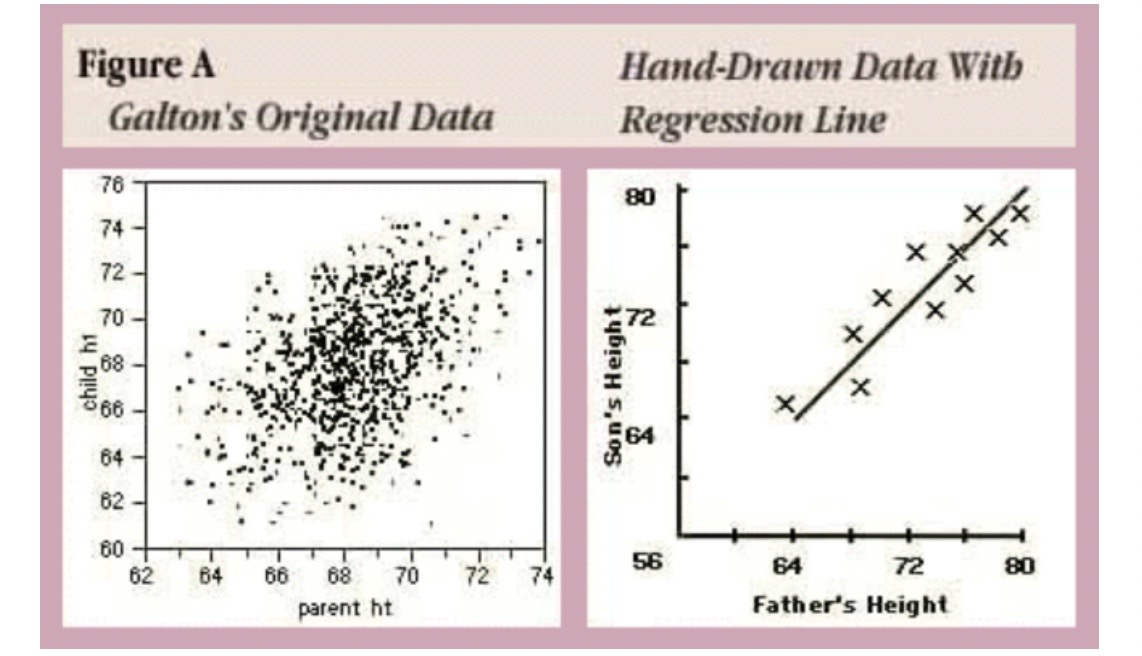

그래프를 보시면 아버지의 키인 x와 자식의 키인 y 사이의 직선 형태의 기울기가 1보다 작으므로, 세대를 거듭할수록 아버지의 키가 크든 작든 무관하게 자식의 키는 전체 평균으로 수렴하게 될 것이다.

즉, 통계적으로 평균으로 회귀한다는 뜻에서 처음 Galthon이라는 학자가 말을 했습니다.

위의 같은 내용은 과거의 회귀 내용이었다면, 현재는 두 개 이상의 변수 사이의 함수 관계를 추구하는 통계적인 방법을 의미합니다.

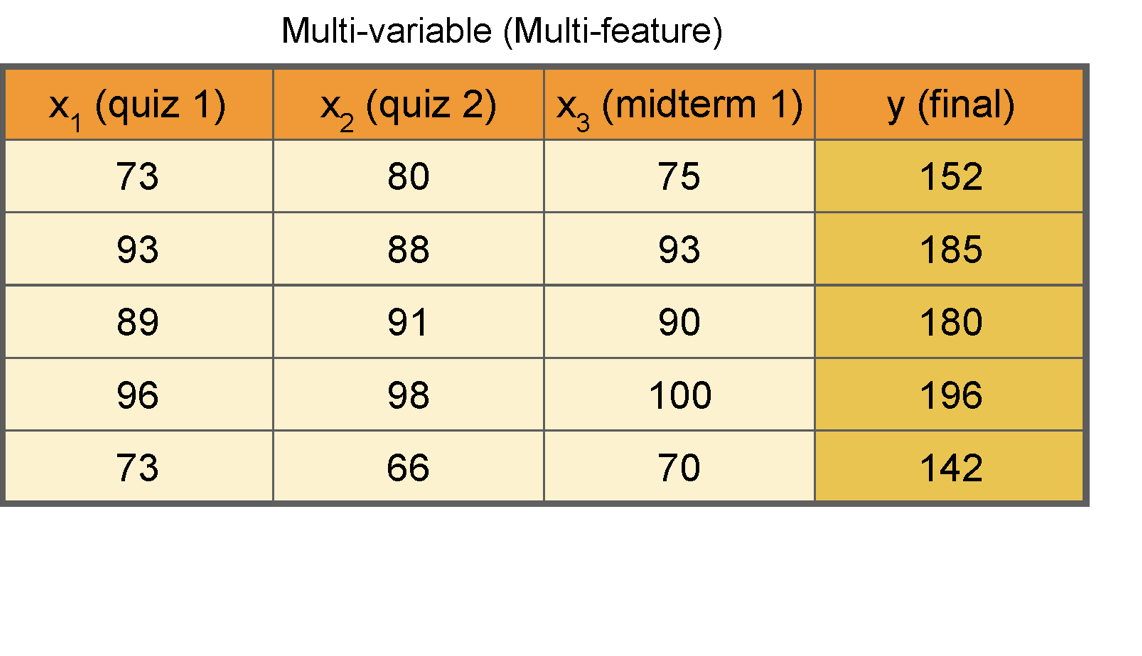

**선형 회귀분석의 기본 가정**

- 가정 내에 들어오게 된다면, 회귀 분석을 시도해볼만큼 문제를 해결할 때 많이 이용됨

- 회귀 분석을 통해서 우리가 예측하고자 하는 종속변수가 우리가 확보하고 있는 독립변수 데이터와의 명확한 관계가 규명되면, 새로운 종속변수에 대한 예측 가능성도 새롭게 얻어질 것입니다.

   - 기본 가정은 총 4개

   - 선형성

   - 독립성

   - 등분산성

   - 정규성

https://kkokkilkon.tistory.com/175?category=640119

### 회귀모델 : Linear Regression


**선형 회귀 모델링**

- 식

>y = ax + c (a:회귀계수, c: 오차[종속 변수와 독립 변수 사이의)

>a,c는 우리 데이터로부터 추정해야하는 파라미터이므로, x와 y의 데이터가 있을 때 a와c를 추정한 후 추정한 값을 바탕으로 모델링 진행

>모델을 기반으로 새로운 데이터의 x값을 입력으로 주었을 때, 그에 해당하는 y값을 추론

>즉, 정리하자면, 선형회귀 모델을 찾는 것은 주어진 데이터에 우리의 선형식이 잘 맞도록 회귀계수와 오차를 구하는 것을 의미

<br>

**머신러닝에서의 선형회귀모델 표기법**

- 식

>H = Wx + b

>H:가정(Hypothesis), W: 가중치(Weight), b: 편향(bias)

>머신러닝 혹은 딥러닝을 이용해서 회귀 모델을 구한다는 것은 주어진 데이터를 이용하여 W와 b를 구하기

>회귀모델에서의 회귀계수 a 는 W, c가 b에 해당한다.

>물론, W,b는 단순 스칼라 값이 아닌 고차원의 행렬 형태를 띄고 있거나 파라미터의 개수가 많을수록 모델의 크기가 커지고 학습이 어렵다.





#### 코드로 보는 선형 회귀 모델

**데이터셋 준비하기(Boston house prices dataset)**

- scikit-learn 에서 제공하는 기본 Boston house prices dataset 활용

In [2]:
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

#데이터 로드

boston = load_boston()
data, price = boston['data'],boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns = boston['feature_names'])
print("boston dataset의 차원:", data.shape)
print("price의 차원:", price.shape)
print("boston train dataset의 차원:", x_train.shape)
print("boston test dataset의 차원:", x_test.shape)

print("Boston dataset의 예시")
df.head() #data요약

boston dataset의 차원: (506, 13)
price의 차원: (506,)
boston train dataset의 차원: (404, 13)
boston test dataset의 차원: (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44
1,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
2,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4.0,304.0,18.4,395.69,9.28
3,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4.0,307.0,21.0,387.94,12.80
4,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01


**Boston dataset**

- 506 row

- 13가지의 attribute 구성

- row에 대응되는 가격의 값이 price


In [3]:
print(boston["DESCR"]) #자세한 데이터 정보

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Boston Dataset에 Linear Regression 적용**



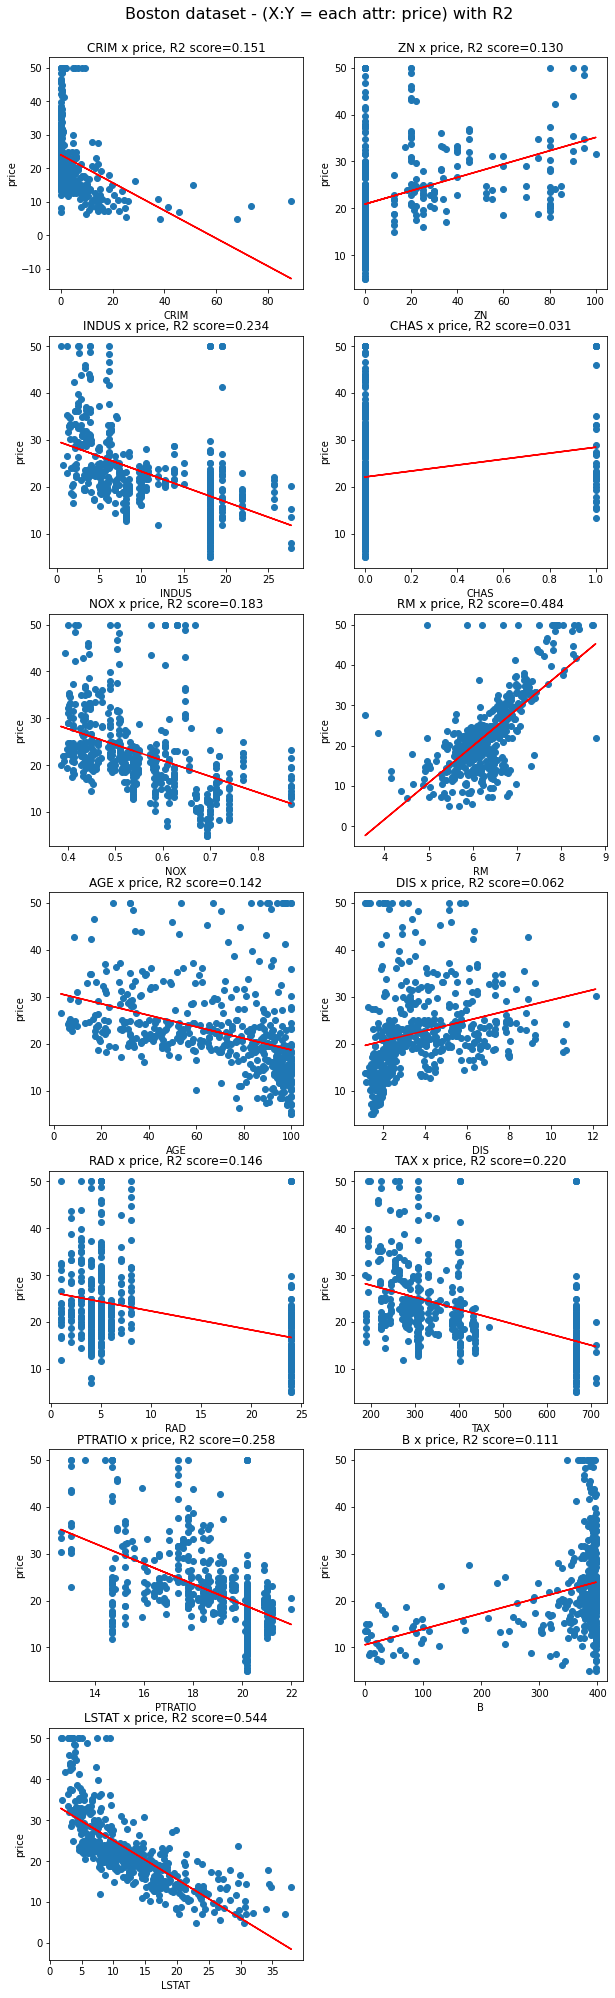

In [4]:
#Boston Dataset에 attribute에 선형회귀 적용하는 예제

import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): #boston dataset에서 i번째 attribute(column)을 살펴봅니다.

    single_attr, attr_name = data[:, i].reshape(-1,1), boston['feature_names'][i]
    estimator = LinearRegression()#선형회귀 모델

    #x에는 single_attr, y는 price에 해당하는 데이터를 대입해서 최소제곱법
    estimator.fit(single_attr, price)
    #위 fit()과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때 예측 Y값
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price)#결정계수를 구하는 함수

    #캔버스 생성

    ax = fig.add_subplot(7,2,i+1)
    ax.scatter(single_attr, price)#실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color= 'red')#선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name, score)) #subplot의 제목
    ax.set_xlabel(attr_name)#x축
    ax.set_ylabel('price') #y축

**경사 하강법(Gradient Descent Algorithm)**

- 적절한 회귀모델의 회귀계수를 찾기 위해서 결국 손실함수 설정

- 주어진 데이터에 대하여 손실함수를 최소화하는 W와 b를 구하는 것이 핵심

- 손실함수의 형태가 주어진 데이터의 분포를 잘 반영하는 것이 중요하지만 항상 데이터의 분포를 알 수 없다.

- 머신러닝에서는 가중치의 그래디언트가 최소가 되는 지점이 손실 함수를 최소로하는 지점

- 보통 가중치 함수는 아래로 볼록한 형태



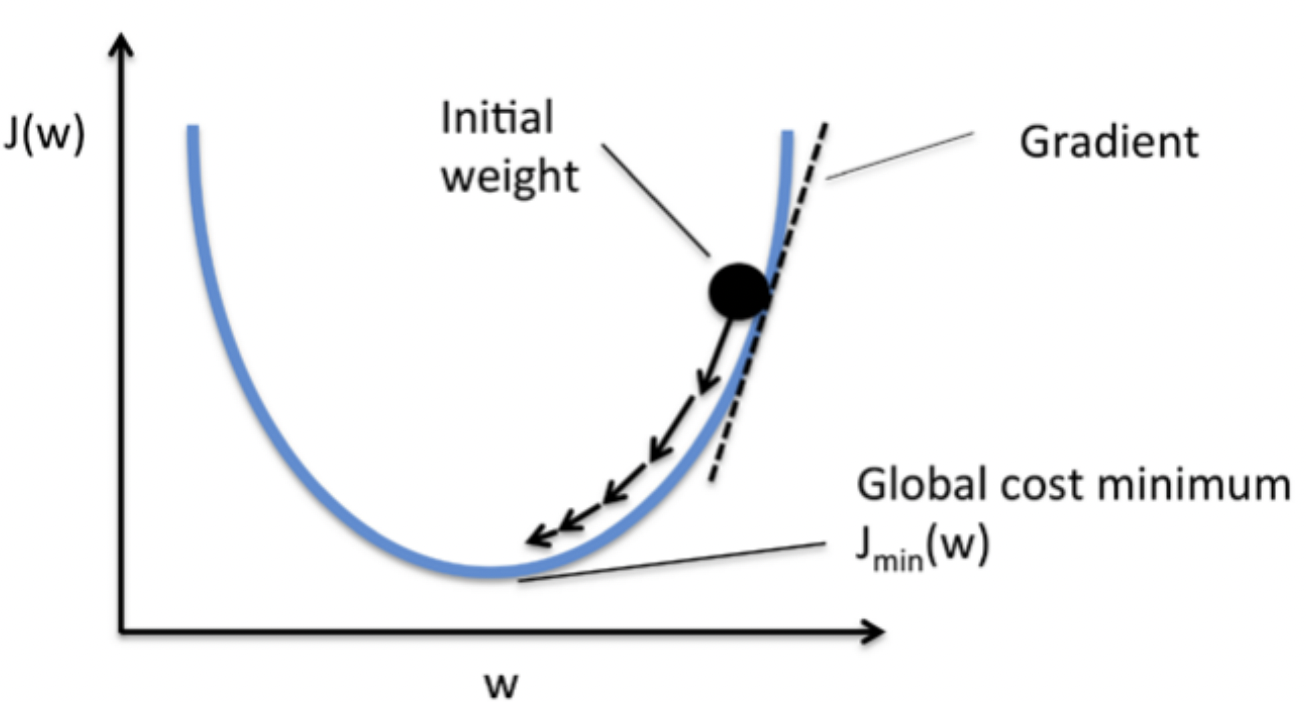

**J(W)를 최소로하는 가중치 값 가지기**

- 기울기(그래디언트)값이 가장 작은 중앙에 놓기

- 손실함수를 최소로 하는 가중치를 한 번에 알면 좋지만 그렇지 않으므로 파라미터의 개수가 많다면 시간이 엄청 걸리게 되므로 항상 최적의 가중치를 찾을 수 없다.

- 저 최소점으로 가기 위해서 그래디언트 값을 다음 식으로 업데이트

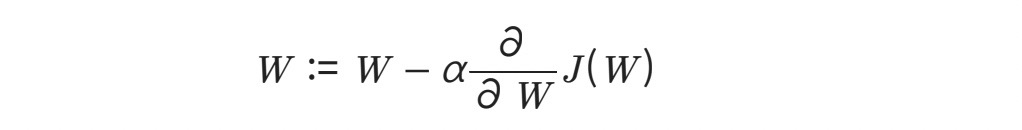



*알파에 해당하는 값이 우리가 많이 듣던 learning rate.*

- 이 값이 클수록 그림의 화살표의 길이가 길어지면 좀 더 빠른 수렴

- 너무 크면 수련을 못하는 경우도 생기기에 적절하게 하는 것이 중요하다


